In [1]:
# set working directory to currtent folder
import os 
os.chdir("github/Fin_Toolkit_Learn/Data_Analysis/")

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import datetime

In [21]:
# User input for the stock ticker symbol
ticker = input("Enter the stock ticker: ").strip().upper().replace("$", "")
#strip(): remove extra white space
#uper(): converts to uppercase

Enter the stock ticker:  aapl


### Download data without YFiance rate limits error

In [2]:
from curl_cffi import requests

#### Hisotrical Data

In [3]:
ticker = 'AAPL'

In [ ]:
### Issue happens with YFinance , their eigiene is currently down!!!

In [14]:
def fetch_stock_data(ticker, years=5):
    try:
        # Calculate the start date
        start_date = (datetime.date.today() - datetime.timedelta(days=int(365.25 * years))).strftime('%Y-%m-%d')
        end_date = datetime.date.today().strftime('%Y-%m-%d')
        
        # Fetch historical data
        data = yf.download(
            tickers=ticker,
            start=start_date,
            end=end_date,
            progress=False
        )['Close']
        
        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return pd.Series(dtype=float)

# Fetch stock data
ticker = "AAPL"
stock_data = fetch_stock_data(ticker, years=5)

if stock_data.empty:
    print(f"No data found for {ticker}. Exiting.")
else:
    print(stock_data.head())



1 Failed download:
['AAPL']: AttributeError("'str' object has no attribute 'name'")


No data found for AAPL. Exiting.


In [10]:
# Create a custom session that impersonates a Chrome browser
session = requests.Session(impersonate="chrome")

n=5

def fetch_stock_data(ticker, years=n, session=None):
    try:
        # Calculate the start date and end date
        start_date = datetime.date.today() - datetime.timedelta(days=int(365.25 * years))
        end_date = datetime.date.today()
        
        data = yf.download(
            tickers=ticker,
            start=start_date,
            end=end_date,
            session=session,
            progress=False
         )['Adj Close']
        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return pd.Series()
    
# Fetch stock data
stock_data = fetch_stock_data(ticker, years=n, session=session)
if stock_data.empty:
    print(f"No data found for {ticker}. Exiting.")
else:
    print(f"Data successfully fetched for {ticker}.")
    print(stock_data.head())


1 Failed download:
['AAPL']: AttributeError("'str' object has no attribute 'name'")


No data found for AAPL. Exiting.


In [15]:
# Fetch stock data for the past 5 years
start = datetime.date.today() - datetime.timedelta(days=int(365.25 * 5))
ticker = 'AAPL'
try:
    stock_data = yf.Ticker(ticker, session=session).history(start=start)['Adj Close']
except Exception as e:
    print(f"Error fetching data for {ticker}: {e}")
    exit()

$AAPL: possibly delisted; no price data found  (1d 2020-05-15 -> 2025-05-15)


In [10]:
stock_data.head

NameError: name 'stock_data' is not defined

#### Index Benchmark

In [ ]:
index = 'SPY'  # S&P500 as the index for comparison

### Plot Historical Data and Distribution

NameError: name 'stock_data' is not defined

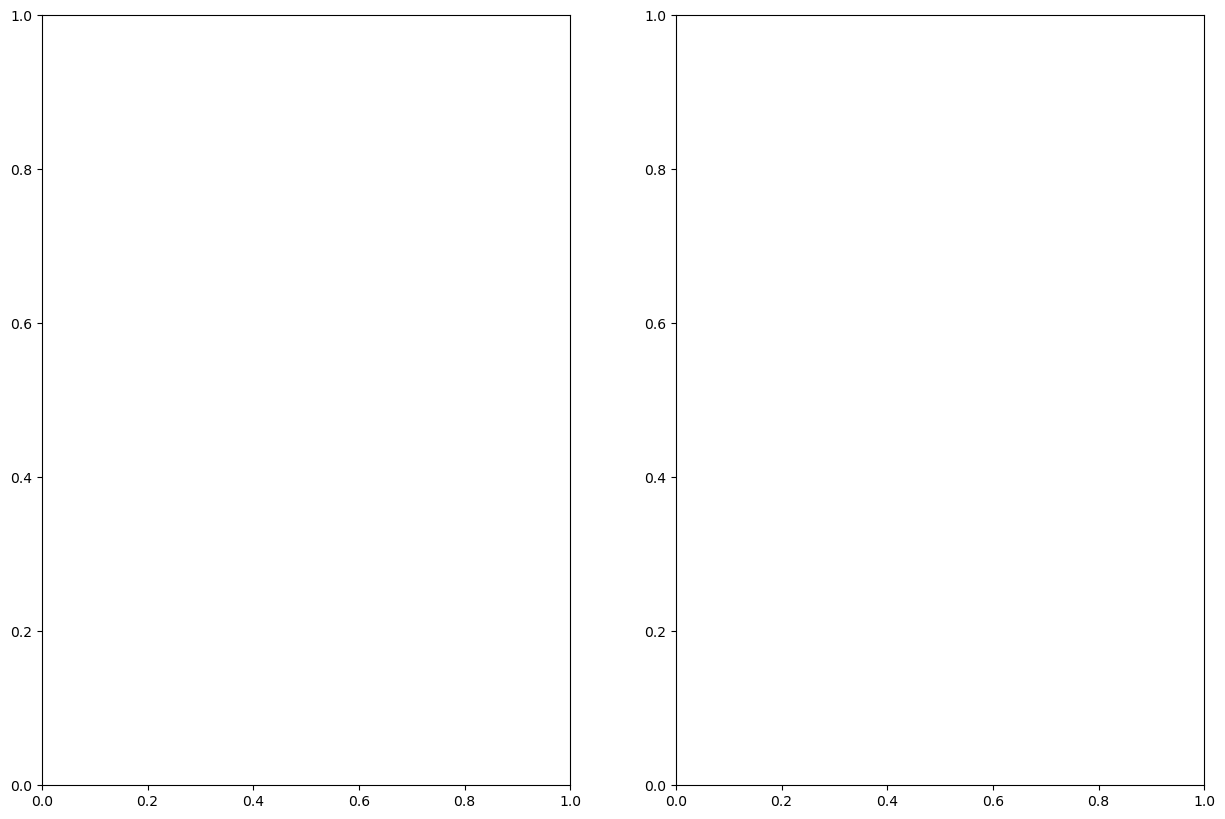

In [9]:
# Plotting stock prices and their distribution
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
stock_data.plot(title=f'{ticker.upper()} Price', ax=ax[0])
stock_data.plot.hist(title=f'{ticker.upper()} Price Distribution', ax=ax[1], bins=30)
plt.tight_layout()
plt.show()

In [ ]:
# Calculating and plotting stock returns
stock_returns = stock_data.apply(np.log).diff(1)
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
stock_returns.plot(title=f'{ticker.upper()} Returns', ax=ax[0])
stock_returns.plot.hist(title=f'{ticker.upper()} Returns Distribution', ax=ax[1], bins=30)
plt.tight_layout()
plt.show()

# Rolling statistics for stock returns
rolling_window = 22
rolling_mean = stock_returns.rolling(rolling_window).mean()
rolling_std = stock_returns.rolling(rolling_window).std()
rolling_skew = stock_returns.rolling(rolling_window).skew()
rolling_kurtosis = stock_returns.rolling(rolling_window).kurt()

# Combining rolling statistics into a DataFrame
signals = pd.concat([rolling_mean, rolling_std, rolling_skew, rolling_kurtosis], axis=1)
signals.columns = ['Mean', 'Std Dev', 'Skewness', 'Kurtosis']
signals.plot(subplots=True, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Volatility analysis for S&P500
index_data = yf.download(index, start=start)['Adj Close']
index_returns = index_data.apply(np.log).diff(1)
index_volatility = index_returns.rolling(rolling_window).std()

# Gaussian Mixture Model on S&P500 volatility
gmm_labels = GaussianMixture(2).fit_predict(index_volatility.values.reshape(-1, 1))
index_data = index_data.reindex(index_volatility.index)

# Plotting volatility regimes
plt.figure()
index_data[gmm_labels == 0].plot(style='bo', alpha=0.2)
index_data[gmm_labels == 1].plot(style='ro', alpha=0.2)
plt.title(f'{index} Volatility Regimes (Gaussian Mixture)')
plt.tight_layout()
plt.show()